In [ ]:
pip install mediapipe-model-maker

In [ ]:
from google.colab import files
import os
import tensorflow as tf
assert tf.__version__.startswith('2')

from mediapipe_model_maker import gesture_recognizer

import matplotlib.pyplot as plt

In [ ]:
import kagglehub

dataset_path = kagglehub.dataset_download("innominate817/hagrid-sample-30k-384p")

print("Path to dataset files:", dataset_path)

Path to dataset files: /root/.cache/kagglehub/datasets/innominate817/hagrid-sample-30k-384p/versions/5


In [ ]:
!rm -r  /root/.cache/kagglehub/datasets/innominate817/hagrid-sample-30k-384p/versions/5/reductionDataSet
!mkdir /root/.cache/kagglehub/datasets/innominate817/hagrid-sample-30k-384p/versions/5/reductionDataSet

In [ ]:
source_dir = "/root/.cache/kagglehub/datasets/innominate817/hagrid-sample-30k-384p/versions/5/hagrid-sample-30k-384p/hagrid_30k"
target_dir = "/root/.cache/kagglehub/datasets/innominate817/hagrid-sample-30k-384p/versions/5/reductionDataSet"

os.makedirs(target_dir, exist_ok=True)

In [ ]:
import shutil


In [ ]:
# Ottieni le prime 5 cartelle dalla directory sorgente
folders = [folder for folder in os.listdir(source_dir) if os.path.isdir(os.path.join(source_dir, folder))]
folders_to_copy = folders[:5]

# Iterare sulle cartelle selezionate
for folder_name in folders_to_copy:
    source_folder = os.path.join(source_dir, folder_name)
    target_folder = os.path.join(target_dir, folder_name)
    os.makedirs(target_folder, exist_ok=True)

    # Elencare i file nella cartella sorgente
    files = os.listdir(source_folder)

    # Limitare il numero di file a 300
    files_to_copy = files[:300]

    # Copiare i file nella cartella di destinazione
    for file_name in files_to_copy:
        source_file = os.path.join(source_folder, file_name)
        target_file = os.path.join(target_folder, file_name)
        shutil.copy2(source_file, target_file)  # Copia con i metadati

    print(f"Copiati {len(files_to_copy)} file dalla cartella '{folder_name}' a '{target_folder}'")

print("Operazione completata.")


Copiati 300 file dalla cartella 'train_val_four' a '/root/.cache/kagglehub/datasets/innominate817/hagrid-sample-30k-384p/versions/5/reductionDataSet/train_val_four'
Copiati 300 file dalla cartella 'train_val_three' a '/root/.cache/kagglehub/datasets/innominate817/hagrid-sample-30k-384p/versions/5/reductionDataSet/train_val_three'
Copiati 300 file dalla cartella 'train_val_two_up_inverted' a '/root/.cache/kagglehub/datasets/innominate817/hagrid-sample-30k-384p/versions/5/reductionDataSet/train_val_two_up_inverted'
Copiati 300 file dalla cartella 'train_val_one' a '/root/.cache/kagglehub/datasets/innominate817/hagrid-sample-30k-384p/versions/5/reductionDataSet/train_val_one'
Copiati 300 file dalla cartella 'train_val_three2' a '/root/.cache/kagglehub/datasets/innominate817/hagrid-sample-30k-384p/versions/5/reductionDataSet/train_val_three2'
Operazione completata.


In [ ]:
!mkdir /root/.cache/kagglehub/datasets/innominate817/hagrid-sample-30k-384p/versions/5/reductionDataSet/None

In [ ]:
dataset_path = target_dir
print(target_dir)
labels = []
for i in os.listdir(dataset_path):
  if os.path.isdir(os.path.join(dataset_path, i)):
    labels.append(i)
print(labels)

/root/.cache/kagglehub/datasets/innominate817/hagrid-sample-30k-384p/versions/5/reductionDataSet
['train_val_four', 'train_val_three', 'train_val_two_up_inverted', 'train_val_one', 'train_val_three2', 'None']


In [ ]:
%matplotlib inline

IndexError: list index out of range

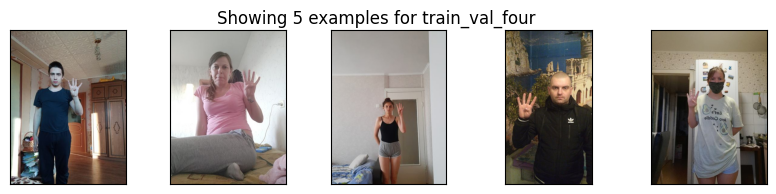

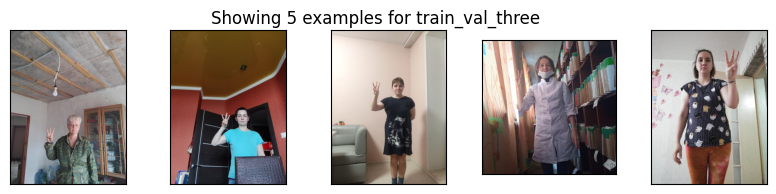

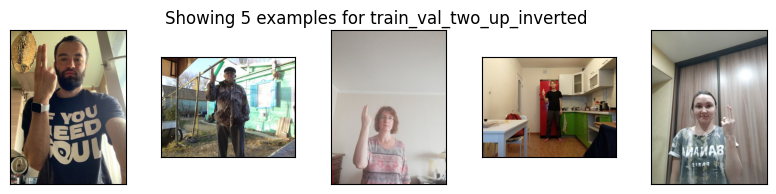

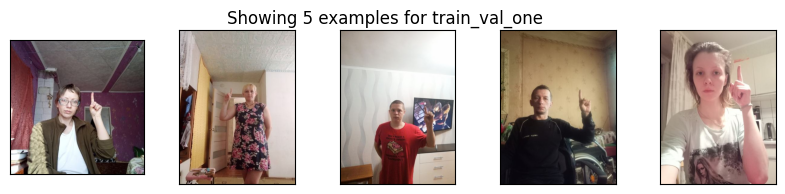

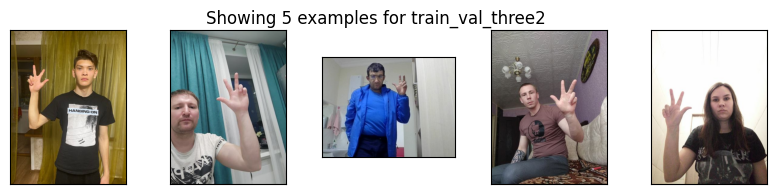

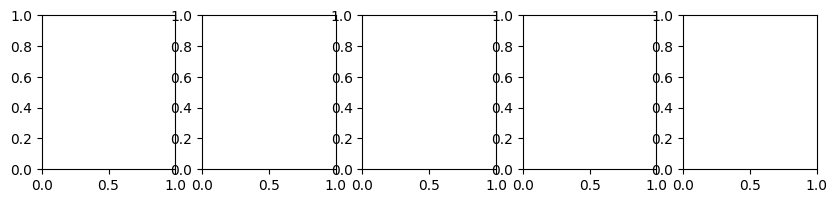

In [ ]:
NUM_EXAMPLES = 5

for label in labels:
  label_dir = os.path.join(dataset_path, label)
  example_filenames = os.listdir(label_dir)[:NUM_EXAMPLES]
  fig, axs = plt.subplots(1, NUM_EXAMPLES, figsize=(10,2))
  for i in range(NUM_EXAMPLES):
    axs[i].imshow(plt.imread(os.path.join(label_dir, example_filenames[i])))
    axs[i].get_xaxis().set_visible(False)
    axs[i].get_yaxis().set_visible(False)
  fig.suptitle(f'Showing {NUM_EXAMPLES} examples for {label}')

plt.show()

In [ ]:
data = gesture_recognizer.Dataset.from_folder(
    dirname=dataset_path,
    hparams=gesture_recognizer.HandDataPreprocessingParams()
)
train_data, rest_data = data.split(0.8)
validation_data, test_data = rest_data.split(0.5)

Using existing files at /tmp/model_maker/gesture_recognizer/palm_detection_full.tflite
Using existing files at /tmp/model_maker/gesture_recognizer/hand_landmark_full.tflite


In [ ]:
hparams = gesture_recognizer.HParams(export_dir="exported_model")
options = gesture_recognizer.GestureRecognizerOptions(hparams=hparams)
model = gesture_recognizer.GestureRecognizer.create(
    train_data=train_data,
    validation_data=validation_data,
    options=options
)

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hand_embedding (InputLayer  [(None, 128)]             0         
 )                                                               
                                                                 
 batch_normalization (Batch  (None, 128)               512       
 Normalization)                                                  
                                                                 
 re_lu (ReLU)                (None, 128)               0         
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 custom_gesture_recognizer_  (None, 6)                 774       
 out (Dense)                                                     
                                                             

In [ ]:
loss, acc = model.evaluate(test_data, batch_size=1)
print(f"Test loss:{loss}, Test accuracy:{acc}")

129/129 [==============================] - 4s 4ms/step - loss: 0.0904 - categorical_accuracy: 0.9457
Test loss:0.09038368612527847, Test accuracy:0.9457364082336426


In [ ]:
model.export_model()
!ls exported_model

Using existing files at /tmp/model_maker/gesture_recognizer/palm_detection_full.tflite
Using existing files at /tmp/model_maker/gesture_recognizer/hand_landmark_full.tflite
best_model_weights.data-00000-of-00001	checkpoint    gesture_recognizer.task  metadata.json
best_model_weights.index		epoch_models  logs


In [ ]:
files.download('exported_model/gesture_recognizer.task')

AttributeError: 'list' object has no attribute 'download'

In [ ]:
hparams = gesture_recognizer.HParams(learning_rate=0.003, export_dir="exported_model_2", epochs=20)
model_options = gesture_recognizer.ModelOptions(dropout_rate=0.2)
options = gesture_recognizer.GestureRecognizerOptions(model_options=model_options, hparams=hparams)
model_2 = gesture_recognizer.GestureRecognizer.create(
    train_data=train_data,
    validation_data=validation_data,
    options=options
)

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hand_embedding (InputLayer  [(None, 128)]             0         
 )                                                               
                                                                 
 batch_normalization_4 (Bat  (None, 128)               512       
 chNormalization)                                                
                                                                 
 re_lu_4 (ReLU)              (None, 128)               0         
                                                                 
 dropout_4 (Dropout)         (None, 128)               0         
                                                                 
 custom_gesture_recognizer_  (None, 4)                 516       
 out (Dense)                                                     
                                                           

In [ ]:
loss, accuracy = model_2.evaluate(test_data)
print(f"Test loss:{loss}, Test accuracy:{accuracy}")

2/2 [==============================] - 1s 47ms/step - loss: 0.1452 - categorical_accuracy: 0.8333
Test loss:0.1451675444841385, Test accuracy:0.8333333134651184


In [ ]:
model_2.export_model()
!ls exported_model

Using existing files at /tmp/model_maker/gesture_recognizer/gesture_embedder.tflite
Using existing files at /tmp/model_maker/gesture_recognizer/palm_detection_full.tflite
Using existing files at /tmp/model_maker/gesture_recognizer/hand_landmark_full.tflite
Using existing files at /tmp/model_maker/gesture_recognizer/canned_gesture_classifier.tflite
best_model_weights.data-00000-of-00001	checkpoint    gesture_recognizer.task  metadata.json
best_model_weights.index		epoch_models  logs
